Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gsu/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/7477652bd6464fa0842a8d708247a05e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/7477652bd6464fa0842a8d708247a05e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 30 RHS
At line 35 BOUNDS
At line 40 ENDATA
Problem MODEL has 4 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 3 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of whi

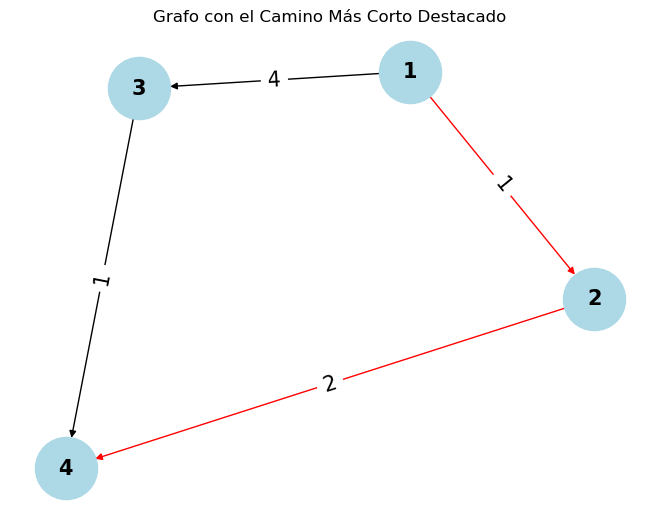

In [1]:
import pulp
import networkx as nx
import matplotlib.pyplot as plt


prob = pulp.LpProblem("Caminos_Mas_Cortos", pulp.LpMinimize)


x12 = pulp.LpVariable('x12', cat='Binary')
x13 = pulp.LpVariable('x13', cat='Binary')
x24 = pulp.LpVariable('x24', cat='Binary')
x34 = pulp.LpVariable('x34', cat='Binary')


prob += x12 + 4*x13 + 2*x24 + x34, "Costo Total"

prob += x12 + x13 == 1, "Conservación_flujo_origen"
prob += x24 - x12 == 0, "Conservación_flujo_nodo2"
prob += x34 - x13 == 0, "Conservación_flujo_nodo3"
prob += x24 + x34 == 1, "Conservación_flujo_destino"

# Resolver el problema
prob.solve()


for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Costo Total del Camino Más Corto = ", pulp.value(prob.objective))


G = nx.DiGraph()


G.add_nodes_from([1, 2, 3, 4])


edges = [(1, 2, 1), (1, 3, 4), (2, 4, 2), (3, 4, 1)]
G.add_weighted_edges_from(edges)


edge_colors = ['red' if prob.variablesDict()[f"x{i}{j}"].varValue == 1 else 'black' for (i, j, _) in edges]


pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15, font_weight="bold", arrows=True, edge_color=edge_colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=15)

plt.title("Grafo con el Camino Más Corto Destacado")
plt.show()
